# Homework #2

In [109]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import math
from tqdm import tqdm
import pprint
from statistics import mean

%matplotlib inline

## Hoeﬀding Inequality

### <font color=firebrick> Ex.1 </font>

In [118]:
def flip_coins(flips, times):
    
    samples = np.random.binomial(1,0.5,[times, flips])
    
    #pick c coins:
    c_1 = samples[0]
    c_rand = samples[random.randrange(0,flips)]
    
    min_head = min(samples.sum(axis = 1))
    
    for i in range(times):
        min_head_sample = sum(samples[i])
        
        if min_head_sample == min_head:
            c_min = samples[i]
            break
    
    
    #calculate frequency for the coins
    
    v_1 = np.mean(c_1)
    v_rand = np.mean(c_rand)
    v_min = np.mean(c_min)
    
    return v_1, v_rand, v_min


In [119]:
samples = 10**5

v_1_samples = []
v_rand_samples = []
v_min_samples = []

for i in tqdm(range(samples)):
    v_1, v_rand, v_min = flip_coins(10, 1000)
    
    v_1_samples.append(v_1)
    v_rand_samples.append(v_rand)
    v_min_samples.append(v_min)
    

100%|██████████| 100000/100000 [01:54<00:00, 873.28it/s]


In [120]:
mean(v_min_samples)

0.037643000000000003

Some plotting

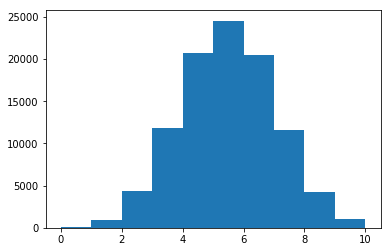

In [121]:
plt.hist(np.multiply(v_1_samples, 10), bins =  np.arange(0, 11, 1))
plt.show()

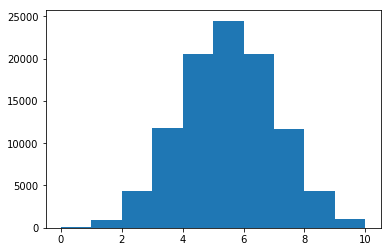

In [122]:
plt.hist(np.multiply(v_rand_samples, 10), bins =  np.arange(0, 11, 1))
plt.show()

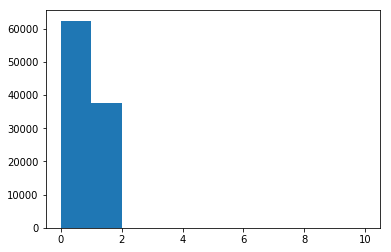

In [123]:
plt.hist(np.multiply(v_min_samples, 10), bins =  np.arange(0, 11, 1))
plt.show()

### <font color=firebrick> Ex.2 </font>

$$
P(| \bar{X} - \mu | > \epsilon )\quad \leq \quad  2e^{-2\epsilon^2N} \Rightarrow \\ 
\Rightarrow P(\bar{X} > \mu + \epsilon  \ \ \cup \ \ \bar{X} < \mu - \epsilon ) \quad \leq \quad 2e^{-2\epsilon^2N} \Rightarrow
$$


In [154]:
mu = 0.5
epsilon = np.arange(0,0.5,0.01)

mu_plus_epsilon = mu + epsilon
mu_minus_epsilon = mu - epsilon

v_1

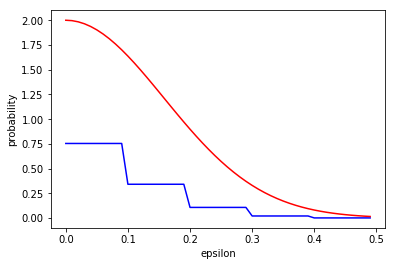

In [161]:
empirical_probability = [sum(np.logical_or(v_1_samples > mu_plus_epsilon[i] \
                                           , v_1_samples < mu_minus_epsilon[i] ) \
                            )/10**5 for i in range(len(erro))]


hoeﬀding_bound = [2*math.exp(-2*(i**2) * 10) for i in epsilon]



#plotting
plt.plot(epsilon, empirical_probability,'b') # plotting t,a separately 
plt.plot(epsilon, hoeﬀding_bound,'r') # plotting t,a separately 
plt.ylabel('probability')
plt.xlabel('epsilon')
plt.show()

v_rand

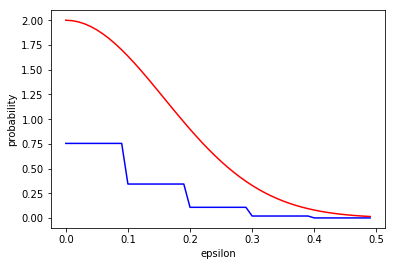

In [162]:
empirical_probability = [sum(np.logical_or(v_rand_samples > mu_plus_epsilon[i] \
                                           , v_rand_samples < mu_minus_epsilon[i] ) \
                            )/samples for i in range(len(erro))]


hoeﬀding_bound = [2*math.exp(-2*(i**2) * 10) for i in epsilon]



#plotting
plt.plot(epsilon, empirical_probability,'b') # plotting t,a separately 
plt.plot(epsilon, hoeﬀding_bound,'r') # plotting t,a separately 
plt.ylabel('probability')
plt.xlabel('epsilon')
plt.show()

v_min

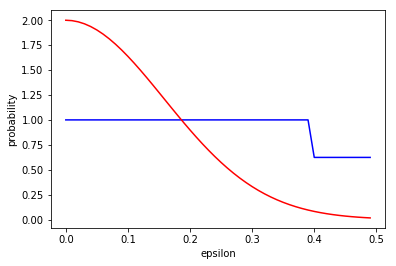

In [163]:
empirical_probability = [sum(np.logical_or(v_min_samples > mu_plus_epsilon[i] \
                                           , v_min_samples < mu_minus_epsilon[i] ) \
                            )/samples for i in range(len(erro))]


hoeﬀding_bound = [2*math.exp(-2*(i**2) * 10) for i in epsilon]



#plotting
plt.plot(epsilon, empirical_probability,'b') # plotting t,a separately 
plt.plot(epsilon, hoeﬀding_bound,'r') # plotting t,a separately 
plt.ylabel('probability')
plt.xlabel('epsilon')
plt.show()

## Error and Noise

### <font color=firebrick> Ex.3 </font>


\begin{align*}
    E_{out}[h(x)]& = E[ \mathbb{1}_{ \{h(x) \neq y \} } ] \\
                    & = P[ h(x) \neq y ] \\
                    & = P[ h(x) \neq f(x) \ \cap \ f(x) = y] \ + \ P[ h(x) = f(x) \ \cap \ f(x) \neq y] \\
                    & = P[ h(x) \neq f(x) ] \ \times P[ f(x) = y] \ + \ P[ h(x) = f(x) ] \times P[ f(x) \neq y] \\
                    & = \mu \lambda + (1-\mu)(1-\lambda)
\end{align*}

### <font color=firebrick> Ex.4 </font>


\begin{align*}
    \lambda = 0.5 \quad \Rightarrow \quad E_{out}[h(x)]& = \mu \lambda + (1-\mu)(1-\lambda) \\
                                                        & = 1 -\lambda +  (\underbrace{2\lambda}_{=1}\mu - \mu) \\
                                                        & = 0.5
\end{align*}

## Linear Regression

### <font color=firebrick> Ex.5 </font>

In [242]:
def linear_regression(x, y):
    
    w = np.linalg.inv(x.T*x)*x.T*y
    
    return w
    

100%|██████████| 1000/1000 [00:00<00:00, 3656.96it/s]


'Average In Sample Error = 0.024879999999999992'

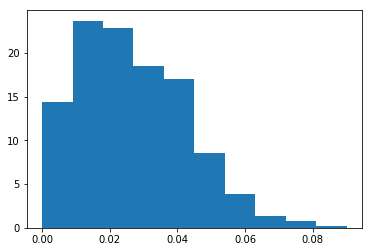

In [265]:
#dimension(d) and sample size(n)
d = 2
n = 100
runs = 1000


#run linear regression
error_in_sample = []
fx_vector = np.empty((runs,d+1))
gx_vector = np.empty((runs,d+1))

for j in tqdm(range(runs)):
    
    #classfication line
    fx = np.matrix('0;' + str(np.random.uniform(-1,1,)) + ';' + str(np.random.uniform(-1,1)))

    #generate sample
    x = np.random.uniform(-1,1, [d,n])
    x0 = np.ones((1,n))
    x = np.matrix(np.vstack((x0, x)))

    y = np.matrix(np.sign(fx.T*x))
    
    #LINEAR REGRESSION
    #transpose x and y to use the linear regression function
    x = x.T
    y = y.T
    
    #run linear regression
    w = linear_regression(x,y)
    
    y_hat = np.array(np.sign(x * w))
    
    error_in_sample.append(np.sum(y_hat != y)/n)
    
    #store weights
    fx_vector[j,] = fx.T
    gx_vector[j,] = w.T

            
#show results
plt.hist(error_in_sample, normed = True)

'Average In Sample Error = {}'.format(sum(error_in_sample)/runs) 

### <font color=firebrick> Ex.6 </font>

100%|██████████| 1000/1000 [00:00<00:00, 6304.73it/s]


'Average Out of Sample Error = 0.034362'

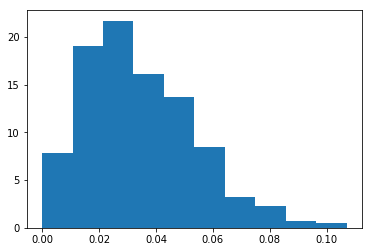

In [272]:
#dimension(d) and sample size(n)
d = 2
n = 1000
runs = 1000


error_out_sample = []

for j in tqdm(range(runs)):
    #classfication line
    fx = np.matrix(fx_vector[j,]).T

    #generate sample
    x = np.random.uniform(-1,1, [d,n])
    x0 = np.ones((1,n))
    x = np.matrix(np.vstack((x0, x)))

    y = np.matrix(np.sign(fx.T*x))
    
    #generate y_hat
    gx = np.matrix(gx_vector[j,]).T
    
    y_hat = np.array(np.sign(x.T * gx))

    #calculate out of sample error
    error_out_sample.append(np.sum(y_hat.T != y)/n)
        
#show results
plt.hist(error_out_sample, normed = True)

'Average Out of Sample Error = {}'.format(sum(error_out_sample)/runs) 

### <font color=firebrick> Ex.7</font>

In [273]:
def perceptron_optimal(w, x, y):
    
    #randomly select one observation where y_hat != y
    k_vector = (np.sign(w.T*x) != y).tolist()[0]
    k = random.choice(np.where(k_vector)[0])
    
    #verify if prediction is equal to the real value

    w = w + x[0:x.shape[0],k]*y[0,k]
        
    return w

100%|██████████| 10000/10000 [00:04<00:00, 2317.48it/s]


'Average # Steps = 3.9118'

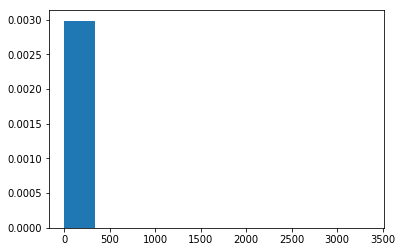

In [281]:
#dimension(d) and sample size(n)
d = 2
n = 10
runs = 10000

#set number of steps
steps = 5000


#run pla
multiple_run_steps = []

for j in tqdm(range(runs)):
    
    #classfication line
    fx = np.matrix('0;' + str(np.random.uniform(-1,1,)) + ';' + str(np.random.uniform(-1,1)))

    #generate sample
    x = np.random.uniform(-1,1, [d,n])
    x0 = np.ones((1,n))
    x = np.matrix(np.vstack((x0, x)))

    y = np.matrix(np.sign(fx.T*x))
    
    w = linear_regression(x.T,y.T)
    
    if np.matrix.all(y == np.sign(w.T*x)):
        multiple_run_steps.append(0)
    else:
        for i in range(steps):
            w = perceptron_optimal(w,x,y)

            if np.matrix.all(y == np.sign(w.T*x)):
                multiple_run_steps.append(i)

                break

            
#show results
plt.hist(multiple_run_steps, normed = True)

'Average # Steps = {}'.format(sum(multiple_run_steps)/len(multiple_run_steps)) 

## Nonlinear Transformation

### <font color=firebrick> Ex.8</font>

100%|██████████| 1000/1000 [00:00<00:00, 1852.71it/s]


'Average In Sample Error = 0.503761000000001'

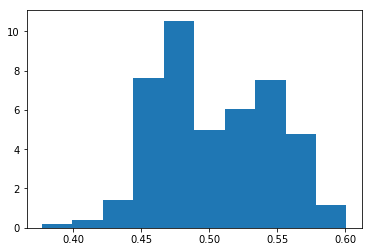

In [524]:
#dimension(d) and sample size(n)
d = 2
n = 1000
runs = 1000

#Linear Regression
error_in_sample = []

for j in tqdm(range(runs)):
    
    x = np.random.uniform(-1,1, [n,d])
    
    fx = np.sign( np.sum( x*x , axis = 1) - 0.6 )
    
    x0 = np.ones((n,1))
    x = np.matrix(np.hstack((x0, x)))
    
    #select 10% random 
    random_index = np.random.choice(n, size = int(0.1*n), replace = False)
    
    y = list(fx)
    
    for i in random_index:
        y[i] = -y[i]
    
    y = np.matrix(y)
    y = y.T
    
    #run linear regression
    w = linear_regression(x,y)
    
    y_hat = np.array(np.sign(x * w))
    
    error_in_sample.append(np.sum(y_hat != y)/n)

#show results
plt.hist(error_in_sample, normed = True)

'Average In Sample Error = {}'.format(sum(error_in_sample)/runs) 

Last iteration plotting

<function matplotlib.pyplot.show>

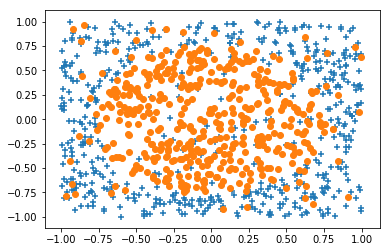

In [529]:
x = x.T

x1_pos = []
x2_pos = []

x1_neg = []
x2_neg = []

for i,valor in enumerate(y):
    if valor == 1:
        x1_pos.append(x[1,i])
        x2_pos.append(x[2,i])
    else:
        x1_neg.append(x[1,i])
        x2_neg.append(x[2,i])       

plt.scatter(x1_pos, x2_pos, marker='+')
plt.scatter(x1_neg, x2_neg, marker='o')

plt.show

### <font color=firebrick> Ex.9</font>

100%|██████████| 1000/1000 [00:00<00:00, 1904.86it/s]


'Average In Sample Error = 0.12415099999999991'

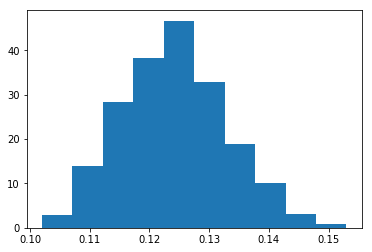

In [605]:
#dimension(d) and sample size(n)
d = 2
n = 1000
runs = 1000

#Linear Regression
error_in_sample = []
gx_vector = np.empty((runs,d+4))


for j in tqdm(range(runs)):
    
    x = np.random.uniform(-1,1, [n,d])
    
    fx = np.sign( np.sum( x*x , axis = 1) - 0.6 )
    
    x1_x2 = np.array(x[:,0] * x[:,1])
    x1_x2 = np.array(np.matrix(np.array(x1_x2))).T #gambiarra para transformar numa array com shape (n,1)
    
    x_2 = x*x
    
    x0 = np.ones((n,1))
    x = np.matrix(np.hstack((x0, x, x1_x2, x_2)))

    
    #select 10% random 
    random_index = np.random.choice(n, size = int(0.1*n), replace = False)
    
    y = list(fx)
    
    for i in random_index:
        y[i] = -y[i]
    
    y = np.matrix(y)
    y = y.T
    
    #run linear regression
    w = linear_regression(x,y)
    
    y_hat = np.array(np.sign(x * w))
    
    #store results
    gx_vector[j,] = w.T
    error_in_sample.append(np.sum(y_hat != y)/n)

#show results
plt.hist(error_in_sample, normed = True)

'Average In Sample Error = {}'.format(sum(error_in_sample)/runs) 

In [606]:
w_weighted = np.sum(gx_vector, axis = 0)/runs
'Average Weights = {}'.format(w_weighted)

'Average Weights = [ -9.90557221e-01  -1.02473948e-04   3.28525022e-04   1.38195315e-03\n   1.55566380e+00   1.55541306e+00]'

In [607]:
w_a = np.matrix('-1, -0.05, 0.08, 0.13, 1.5, 1.5')
w_b = np.matrix('-1, -0.05, 0.08, 0.13, 1.5, 15')
w_c = np.matrix('-1, -0.05, 0.08, 0.13, 15, 1.5')
w_d = np.matrix('-1, -1.5, 0.08, 0.13, 0.05, 0.05')
w_e = np.matrix('-1, -0.05, 0.08, 1.5, 0.15, 0.15')

print('A: {}'.format(np.sum(np.sign(x*np.matrix(w_weighted).T) == np.sign(x*w_a.T))/n))
print('B: {}'.format(np.sum(np.sign(x*np.matrix(w_weighted).T) == np.sign(x*w_b.T))/n))
print('C: {}'.format(np.sum(np.sign(x*np.matrix(w_weighted).T) == np.sign(x*w_c.T))/n))
print('D: {}'.format(np.sum(np.sign(x*np.matrix(w_weighted).T) == np.sign(x*w_d.T))/n))
print('E: {}'.format(np.sum(np.sign(x*np.matrix(w_weighted).T) == np.sign(x*w_e.T))/n))

A: 0.967
B: 0.673
C: 0.636
D: 0.636
E: 0.56


### <font color=firebrick> Ex.10</font>

100%|██████████| 1000/1000 [00:00<00:00, 2392.41it/s]


'Average Out of Sample Error = 0.12312399999999989'

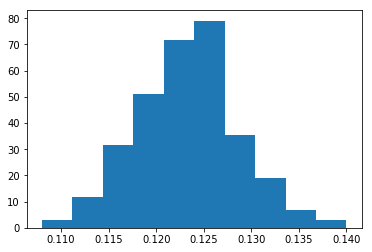

In [608]:
#dimension(d) and sample size(n)
d = 2
n = 1000
runs = 1000

#Linear Regression
error_out_sample = []

for j in tqdm(range(runs)):
    
    x = np.random.uniform(-1,1, [n,d])
    
    fx = np.sign( np.sum( x*x , axis = 1) - 0.6 )
    
    x1_x2 = np.array(x[:,0] * x[:,1])
    x1_x2 = np.array(np.matrix(np.array(x1_x2))).T #gambiarra para transformar numa array com shape (n,1)
    
    x_2 = x*x
    
    x0 = np.ones((n,1))
    x = np.matrix(np.hstack((x0, x, x1_x2, x_2)))

    
    #select 10% random 
    random_index = np.random.choice(n, size = int(0.1*n), replace = False)
    
    y = list(fx)
    
    for i in random_index:
        y[i] = -y[i]
    
    y = np.matrix(y)
    y = y.T
    
    #run linear regression    
    gx = np.matrix(w_weighted).T
    y_hat = np.array(np.sign(x * gx))
    
    #store results
    error_out_sample.append(np.sum(y_hat != y)/n)

#show results
plt.hist(error_out_sample, normed = True)

'Average Out of Sample Error = {}'.format(sum(error_out_sample)/runs) 